<a href="https://colab.research.google.com/github/SJhawar1010/Advanced-Machine-Learning/blob/AML_Project/Weather_Forecasting_AML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm


from scipy.stats import zscore
from datetime import datetime, timedelta
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# DATASET IMPORTING AND READING
df=pd.read_csv("/content/drive/MyDrive/AML_Project/GlobalLandTemperaturesByCountry.csv")
df1=pd.read_csv("/content/drive/MyDrive/AML_Project/GlobalLandTemperaturesByMajorCity.csv")

# EDA for both the Datasets i.e. Global Land Tempreatures by Major City and Global Land Tempreatures by Country

In [ ]:
df

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
...          ...  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  
577461  Zimbabwe  

[577462 rows x 4 columns]

In [ ]:
df1

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1849-01-01              26.704                          1.435   
1       1849-02-01              27.434                          1.362   
2       1849-03-01              28.101                          1.612   
3       1849-04-01              26.140                          1.387   
4       1849-05-01              25.427                          1.200   
...            ...                 ...                            ...   
239172  2013-05-01              18.979                          0.807   
239173  2013-06-01              23.522                          0.647   
239174  2013-07-01              25.251                          1.042   
239175  2013-08-01              24.528                          0.840   
239176  2013-09-01                 NaN                            NaN   

           City        Country Latitude Longitude  
0       Abidjan  Côte D'Ivoire    5.63N     3.23W  
1       Abidjan  Côte D'Ivoire    5.63N     3.23W  
2       Abidjan  Côte D'Ivoire    5.63N     3.23W  
3       Abidjan  Côte D'Ivoire    5.63N     3.23W  
4       Abidjan  Côte D'Ivoire    5.63N     3.23W  
...         ...            ...      ...       ...  
239172     Xian          China   34.56N   108.97E  
239173     Xian          China   34.56N   108.97E  
239174     Xian          China   34.56N   108.97E  
239175     Xian          China   34.56N   108.97E  
239176     Xian          China   34.56N   108.97E  

[239177 rows x 7 columns]

In [ ]:
df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [ ]:
df1.isnull().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [ ]:
df.shape

(577462, 4)

In [ ]:
df1.shape

(239177, 7)

In [ ]:
df.describe()

AverageTemperature  AverageTemperatureUncertainty
count       544811.000000                  545550.000000
mean            17.193354                       1.019057
std             10.953966                       1.201930
min            -37.658000                       0.052000
25%             10.025000                       0.323000
50%             20.901000                       0.571000
75%             25.814000                       1.206000
max             38.842000                      15.003000

In [ ]:
 df1.describe()

AverageTemperature  AverageTemperatureUncertainty
count       228175.000000                  228175.000000
mean            18.125969                       0.969343
std             10.024800                       0.979644
min            -26.772000                       0.040000
25%             12.710000                       0.340000
50%             20.428000                       0.592000
75%             25.918000                       1.320000
max             38.283000                      14.037000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [ ]:
df

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
...          ...  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  
577461  Zimbabwe  

[577462 rows x 4 columns]

In [ ]:
df=df.dropna()

In [ ]:
df

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
5       1744-04-01               1.530                          4.680   
6       1744-05-01               6.702                          1.789   
7       1744-06-01              11.609                          1.577   
8       1744-07-01              15.342                          1.410   
...            ...                 ...                            ...   
577456  2013-04-01              21.142                          0.495   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   

         Country  
0          Åland  
5          Åland  
6          Åland  
7          Åland  
8          Åland  
...          ...  
577456  Zimbabwe  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  

[544811 rows x 4 columns]

In [ ]:
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

we drop
AverageTemperature -32651
AverageTemperatureUncertainty -31912


In [ ]:
df1

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1849-01-01              26.704                          1.435   
1       1849-02-01              27.434                          1.362   
2       1849-03-01              28.101                          1.612   
3       1849-04-01              26.140                          1.387   
4       1849-05-01              25.427                          1.200   
...            ...                 ...                            ...   
239172  2013-05-01              18.979                          0.807   
239173  2013-06-01              23.522                          0.647   
239174  2013-07-01              25.251                          1.042   
239175  2013-08-01              24.528                          0.840   
239176  2013-09-01                 NaN                            NaN   

           City        Country Latitude Longitude  
0       Abidjan  Côte D'Ivoire    5.63N     3.23W  
1       Abidjan  Côte D'Ivoire    5.63N     3.23W  
2       Abidjan  Côte D'Ivoire    5.63N     3.23W  
3       Abidjan  Côte D'Ivoire    5.63N     3.23W  
4       Abidjan  Côte D'Ivoire    5.63N     3.23W  
...         ...            ...      ...       ...  
239172     Xian          China   34.56N   108.97E  
239173     Xian          China   34.56N   108.97E  
239174     Xian          China   34.56N   108.97E  
239175     Xian          China   34.56N   108.97E  
239176     Xian          China   34.56N   108.97E  

[239177 rows x 7 columns]

In [ ]:
df1_filled=df1.dropna()

In [ ]:
df1_filled

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1849-01-01              26.704                          1.435   
1       1849-02-01              27.434                          1.362   
2       1849-03-01              28.101                          1.612   
3       1849-04-01              26.140                          1.387   
4       1849-05-01              25.427                          1.200   
...            ...                 ...                            ...   
239171  2013-04-01              12.563                          1.823   
239172  2013-05-01              18.979                          0.807   
239173  2013-06-01              23.522                          0.647   
239174  2013-07-01              25.251                          1.042   
239175  2013-08-01              24.528                          0.840   

           City        Country Latitude Longitude  
0       Abidjan  Côte D'Ivoire    5.63N     3.23W  
1       Abidjan  Côte D'Ivoire    5.63N     3.23W  
2       Abidjan  Côte D'Ivoire    5.63N     3.23W  
3       Abidjan  Côte D'Ivoire    5.63N     3.23W  
4       Abidjan  Côte D'Ivoire    5.63N     3.23W  
...         ...            ...      ...       ...  
239171     Xian          China   34.56N   108.97E  
239172     Xian          China   34.56N   108.97E  
239173     Xian          China   34.56N   108.97E  
239174     Xian          China   34.56N   108.97E  
239175     Xian          China   34.56N   108.97E  

[228175 rows x 7 columns]

In [ ]:
df1_filled.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

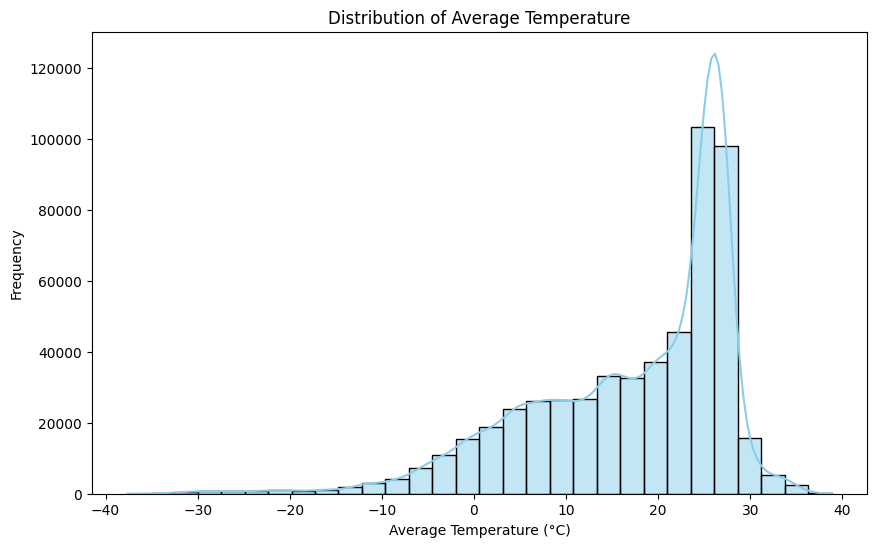

In [ ]:
# Visualize the distribution of AverageTemperature of countries(df)
plt.figure(figsize=(10, 6))
sns.histplot(df['AverageTemperature'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

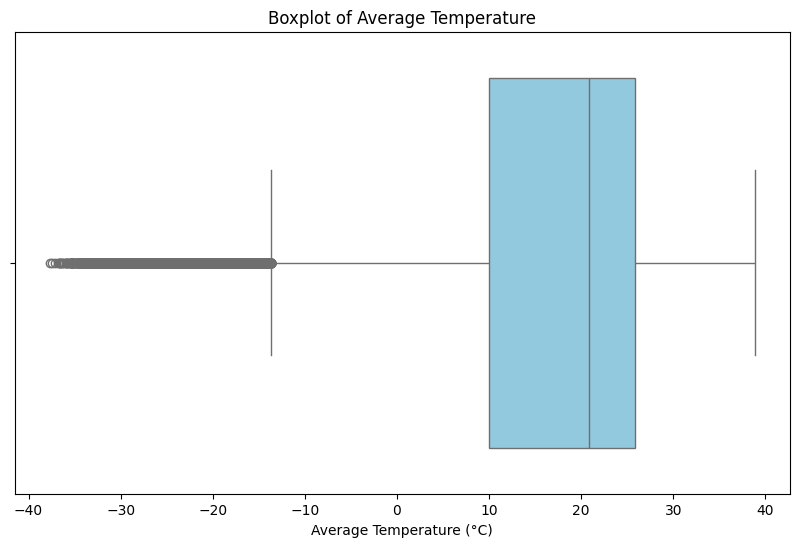

In [ ]:
# Box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='AverageTemperature', data=df, color='skyblue')
plt.title('Boxplot of Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.show()

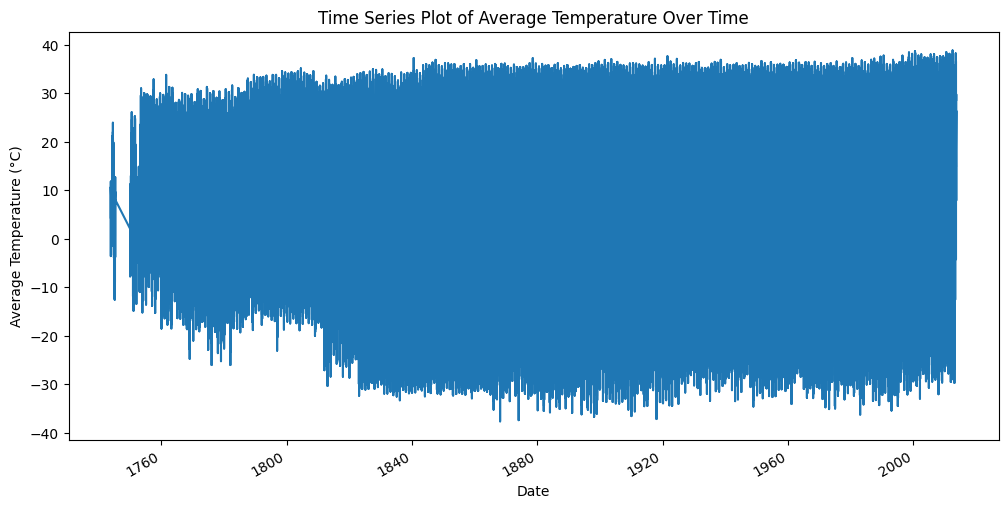

In [ ]:
 # Time series plot for AverageTemperature over time

df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)

plt.figure(figsize=(12, 6))
df['AverageTemperature'].plot()
plt.title('Time Series Plot of Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.show()

In [ ]:
df.corr()

AverageTemperature  \
AverageTemperature                       1.000000   
AverageTemperatureUncertainty           -0.305041   

                               AverageTemperatureUncertainty  
AverageTemperature                                 -0.305041  
AverageTemperatureUncertainty                       1.000000

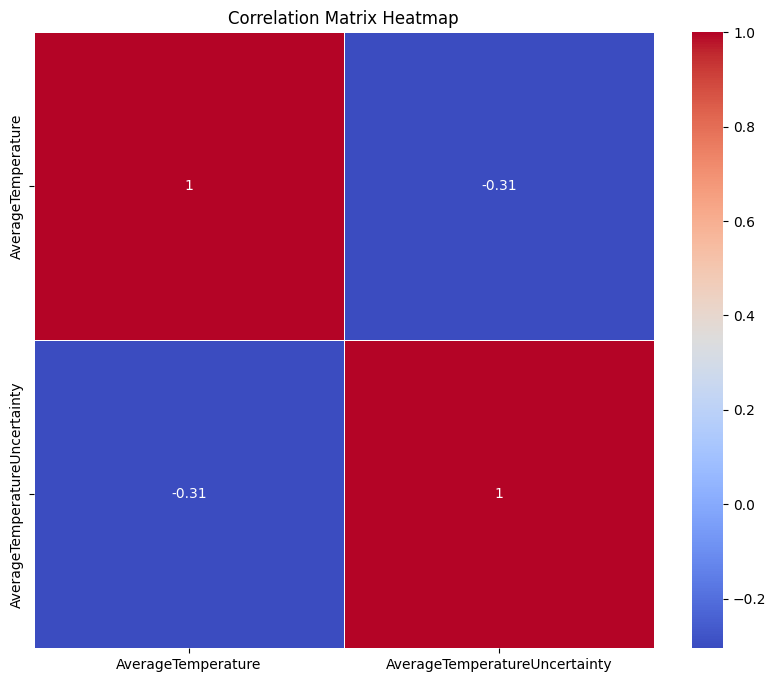

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data Cleaning and Visualization for Global Land Tempreatures by Major City

In [ ]:
df1_filled=df1.drop(df1_filled[df1_filled['City']=='Bra'].index)
df1_filled

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1849-01-01              26.704                          1.435   
1       1849-02-01              27.434                          1.362   
2       1849-03-01              28.101                          1.612   
3       1849-04-01              26.140                          1.387   
4       1849-05-01              25.427                          1.200   
...            ...                 ...                            ...   
239172  2013-05-01              18.979                          0.807   
239173  2013-06-01              23.522                          0.647   
239174  2013-07-01              25.251                          1.042   
239175  2013-08-01              24.528                          0.840   
239176  2013-09-01                 NaN                            NaN   

           City        Country Latitude Longitude  
0       Abidjan  Côte D'Ivoire    5.63N     3.23W  
1       Abidjan  Côte D'Ivoire    5.63N     3.23W  
2       Abidjan  Côte D'Ivoire    5.63N     3.23W  
3       Abidjan  Côte D'Ivoire    5.63N     3.23W  
4       Abidjan  Côte D'Ivoire    5.63N     3.23W  
...         ...            ...      ...       ...  
239172     Xian          China   34.56N   108.97E  
239173     Xian          China   34.56N   108.97E  
239174     Xian          China   34.56N   108.97E  
239175     Xian          China   34.56N   108.97E  
239176     Xian          China   34.56N   108.97E  

[239177 rows x 7 columns]

In [ ]:
df1_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


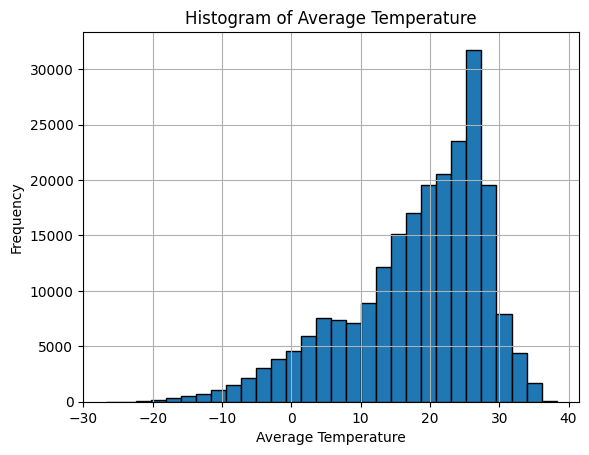

In [ ]:
df1_filled['AverageTemperature'].hist(bins=30, edgecolor='black')
plt.title('Histogram of Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

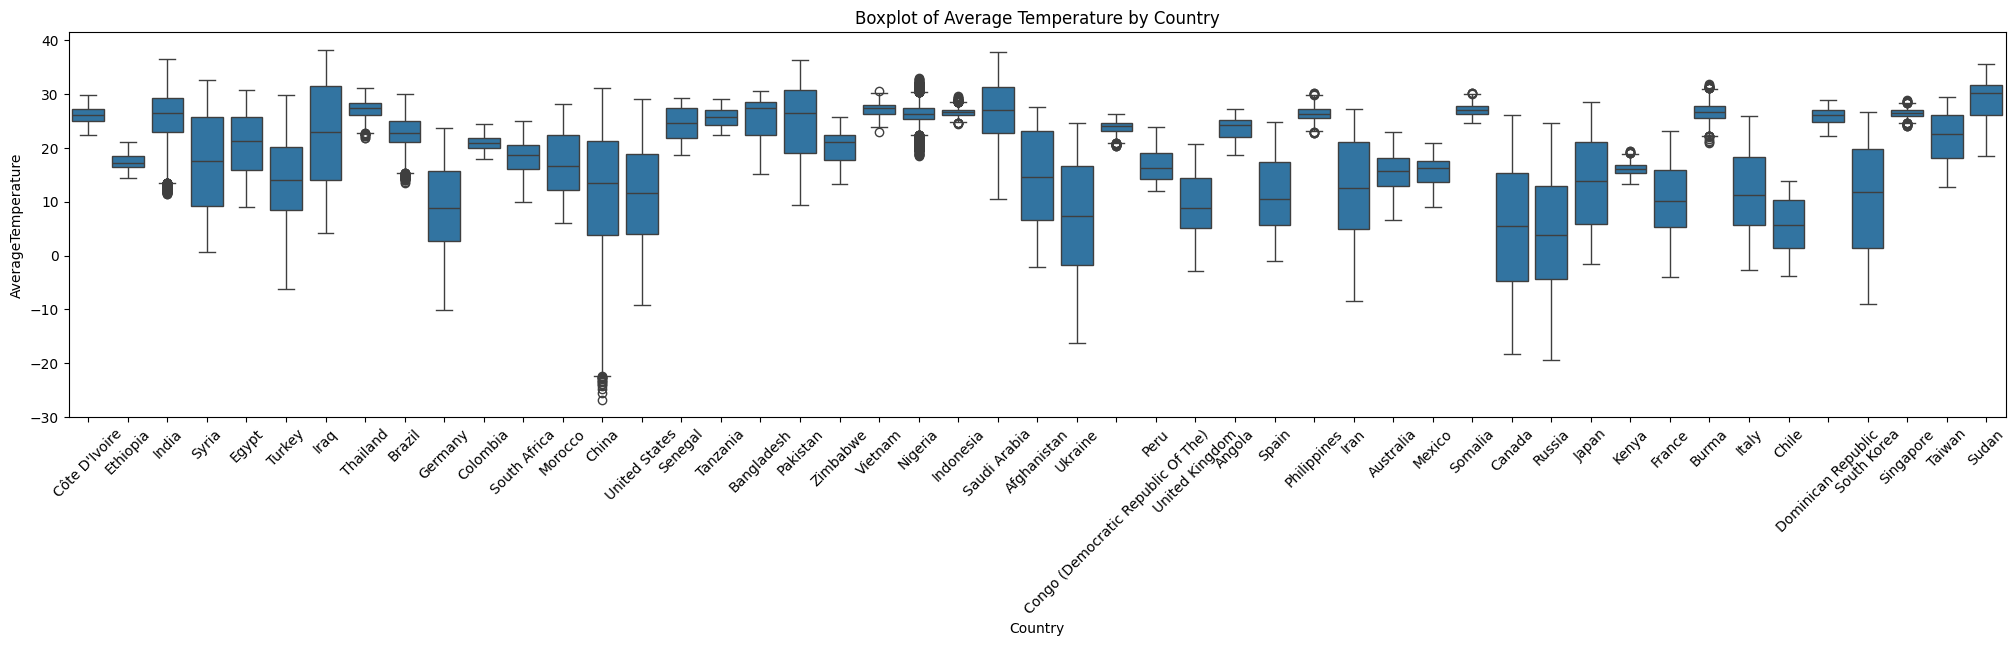

In [ ]:
# Example for 'Country'
plt.figure(figsize=(25,5))
sns.boxplot(x='Country', y='AverageTemperature', data=df1_filled)
plt.title('Boxplot of Average Temperature by Country')
plt.xticks(rotation=45)
plt.show()

In [ ]:
z_scores = zscore(df1.interpolate()['AverageTemperature'])
outliers = (z_scores > 3) | (z_scores < -3)

# Display the outliers
print(df1['AverageTemperature'][outliers])

47042    -15.398
47043    -15.507
47054    -13.935
47055    -16.842
47066    -15.663
           ...  
232104   -12.587
232488   -12.886
232501   -11.684
232513   -12.785
232692   -14.051
Name: AverageTemperature, Length: 1719, dtype: float64


In [ ]:
Q1 = df1['AverageTemperature'].quantile(0.25)
Q3 = df1['AverageTemperature'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df1['AverageTemperature'] < (Q1 - 1.5 * IQR)) | (df1['AverageTemperature'] > (Q3 + 1.5 * IQR))

# Display the outliers
print(df1['AverageTemperature'][outliers])

24778     -8.253
24886     -8.336
25041     -7.790
25114     -8.019
25210     -7.389
           ...  
232849    -9.937
232861    -7.318
232872   -10.656
232884    -7.137
232896    -9.348
Name: AverageTemperature, Length: 4395, dtype: float64


In [ ]:
print(Q1)
print(Q3)
print(IQR)
print(outliers)

12.71
25.918000000000006
13.208000000000006
0         False
1         False
2         False
3         False
4         False
          ...  
239172    False
239173    False
239174    False
239175    False
239176    False
Name: AverageTemperature, Length: 239177, dtype: bool


Q1: The first quartile, which is the value below which 25% of the data falls.
Value: 11.631


Q3: The third quartile, which is the value below which 75% of the data falls.
Value: 25.743


IQR: The interquartile range, which is the range between Q1 and Q3.
Value: 14.112


outliers:Series indicating whether each data point is considered an outlier or not based on the IQR method.

In [ ]:
df1_filled.corr()

AverageTemperature  \
AverageTemperature                        1.00000   
AverageTemperatureUncertainty            -0.19938   

                               AverageTemperatureUncertainty  
AverageTemperature                                  -0.19938  
AverageTemperatureUncertainty                        1.00000

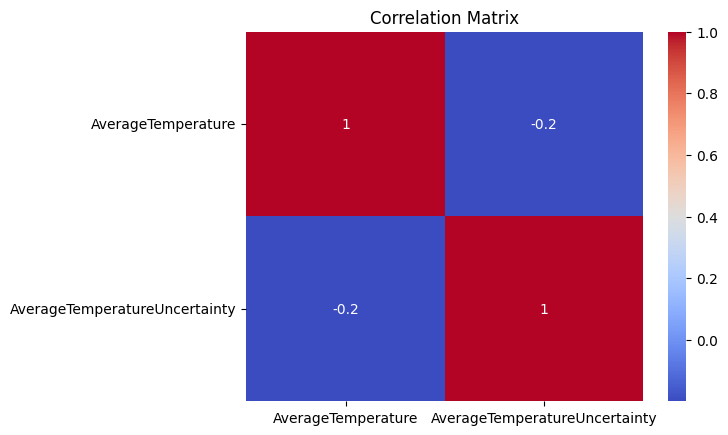

In [ ]:
correlation_matrix = df1_filled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

here  we scale the data by taking random 100 samples from each and we see the positive correlation among the two variable Avg temperature and its uncertainty  

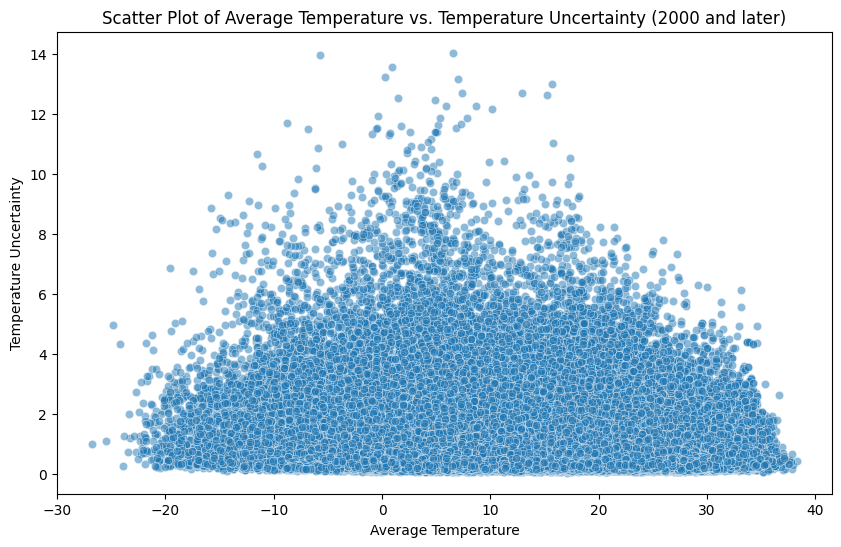

In [ ]:
# Filter data for the years from 2000
df1_filled_2000 = df1_filled.iloc[2000:]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AverageTemperature', y='AverageTemperatureUncertainty', data=df1_filled_2000, alpha=0.5)
plt.title('Scatter Plot of Average Temperature vs. Temperature Uncertainty (2000 and later)')
plt.xlabel('Average Temperature')
plt.ylabel('Temperature Uncertainty')
plt.show()

Scatter plot avg temperature against the uncertainity from 2000 onwards states that the temperature is coinciding among them such that the possibility of prediction for the next few years will be certain at some point

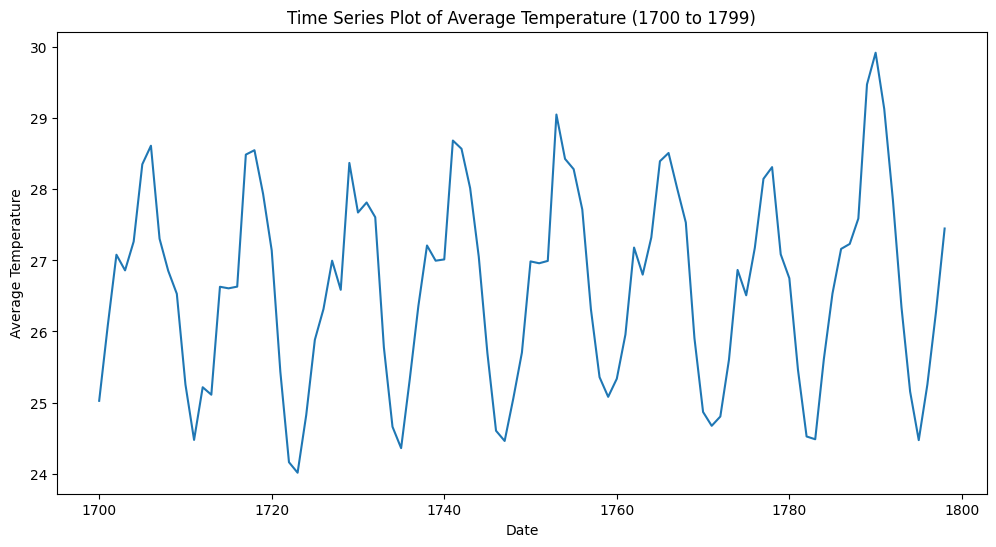

In [ ]:
#time series plot of avg temp from 1700 to 1799
df1_filled_1700 = df1_filled[1700:1799]

# Plot the filtered data
df1_filled_1700['AverageTemperature'].plot(figsize=(12, 6))
plt.title('Time Series Plot of Average Temperature (1700 to 1799)')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()


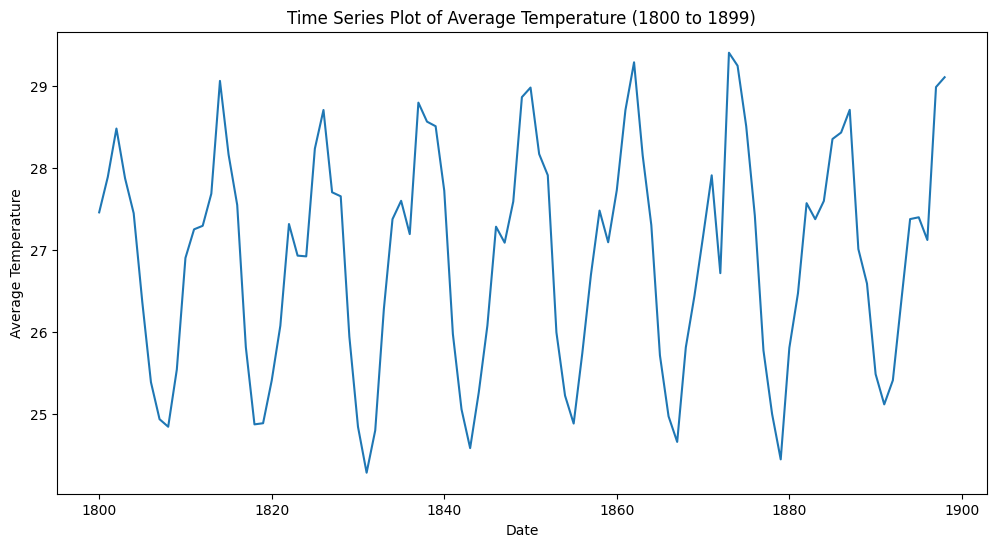

In [ ]:
# Filter data for the years 1800 to 1899
df1_filled_1800 = df1_filled[1800:1899]

# Plot the filtered data
df1_filled_1800['AverageTemperature'].plot(figsize=(12, 6))
plt.title('Time Series Plot of Average Temperature (1800 to 1899)')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()

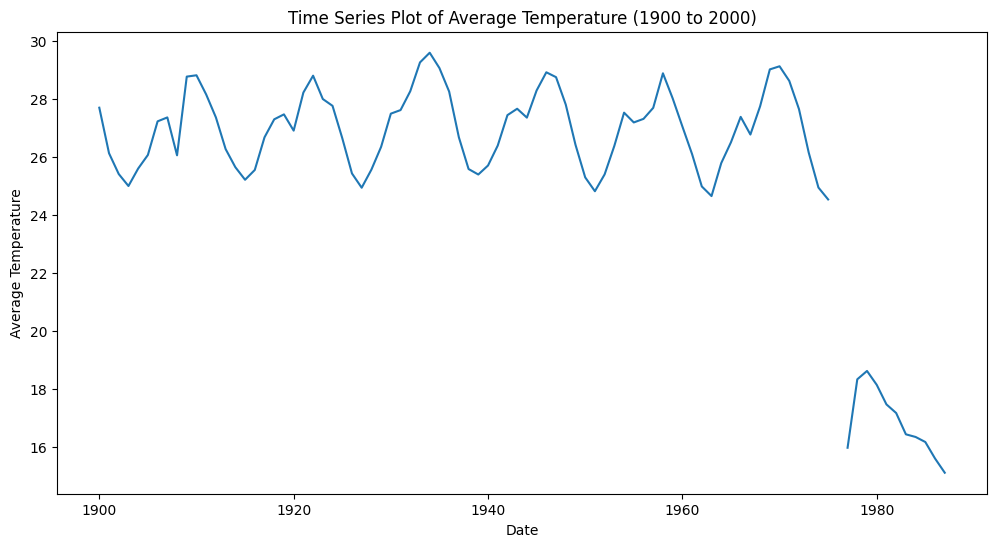

In [ ]:
# Filter data for the years 1900 to 1999
df1_filled_1900 = df1_filled[1900:1999]

# Plot the filtered data
df1_filled_1900['AverageTemperature'].plot(figsize=(12, 6))
plt.title('Time Series Plot of Average Temperature (1900 to 2000)')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()

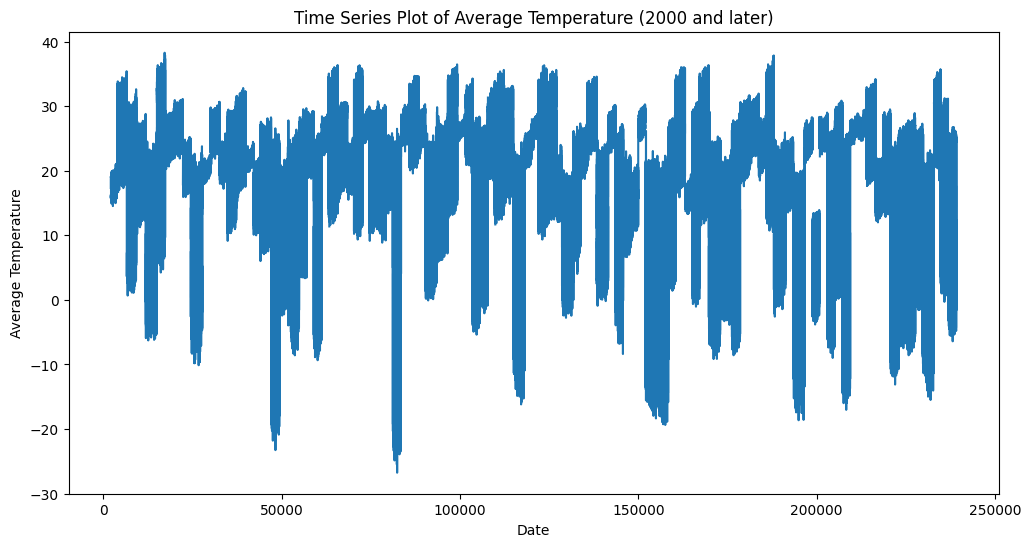

In [ ]:
df1_filled_2000 = df1_filled[2000:]

# Plot the filtered data
df1_filled_2000['AverageTemperature'].plot(figsize=(12, 6))
plt.title('Time Series Plot of Average Temperature (2000 and later)')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()

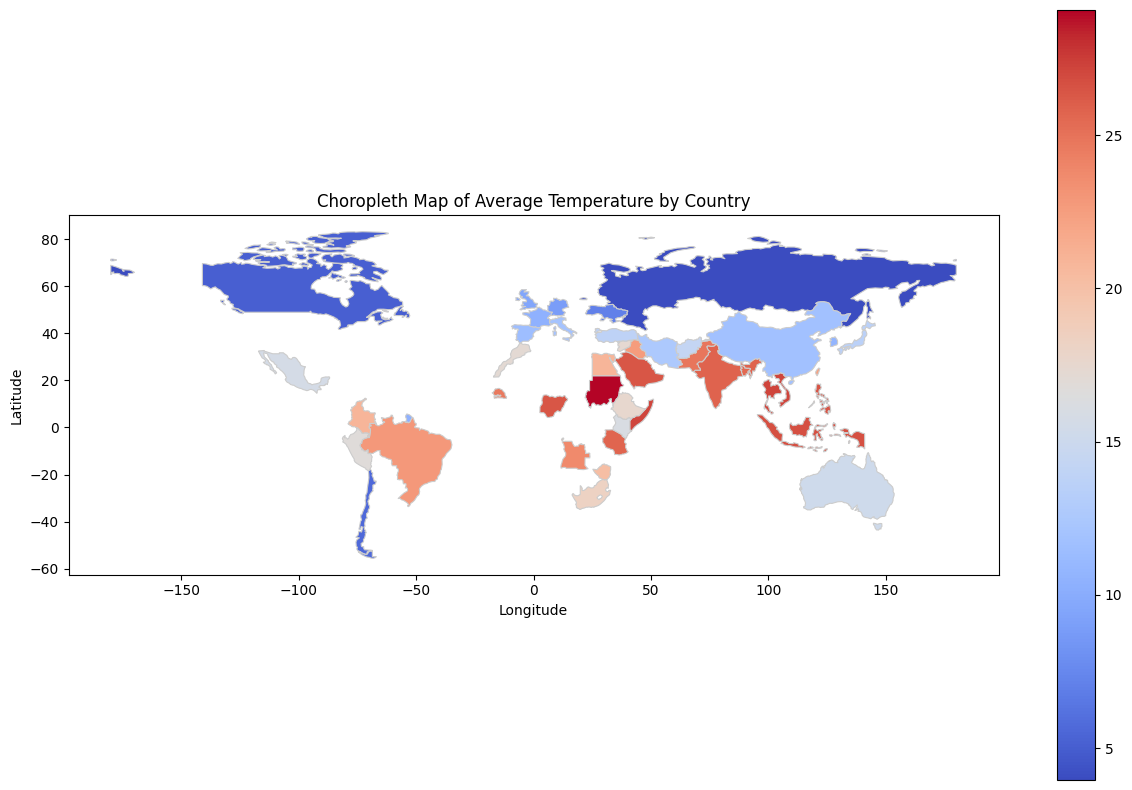

In [ ]:
# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with your DataFrame based on the 'Country' column
merged = world.merge(df1_filled.groupby('Country')['AverageTemperature'].mean().reset_index(), how='left', left_on='name', right_on='Country')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='AverageTemperature', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and labels
plt.title('Choropleth Map of Average Temperature by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

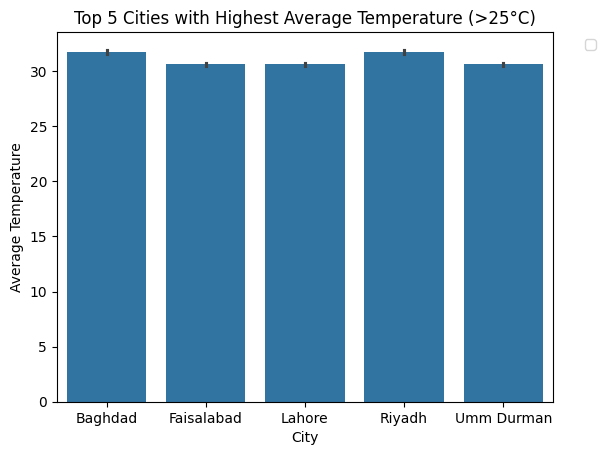

In [ ]:
# Extract data for high temperatures (> 25°C)
high_temp_df = df1_filled[df1_filled['AverageTemperature'] > 25]

# Extract top 5 cities with the highest temperatures
top_5_cities = high_temp_df.groupby('City')['AverageTemperature'].mean().nlargest(5).index
top_5_high_temp_df = high_temp_df[high_temp_df['City'].isin(top_5_cities)]

# Visualize high temperatures for the top 5 cities
sns.barplot(x='City', y='AverageTemperature', data=top_5_high_temp_df)
plt.title('Top 5 Cities with Highest Average Temperature (>25°C)')
plt.xlabel('City')
plt.ylabel('Average Temperature')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

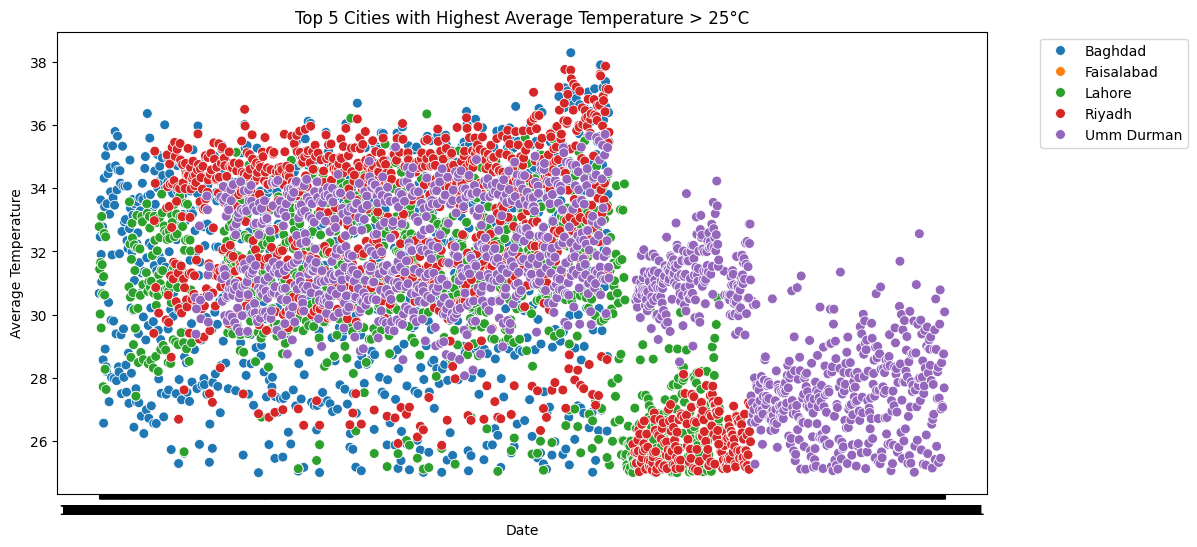

In [ ]:
# Visualize high temperatures for the top 5 cities with scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='dt', y='AverageTemperature', hue='City', data=top_5_high_temp_df, s=50)
plt.title('Top 5 Cities with Highest Average Temperature > 25°C')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
df1_filled

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1849-01-01              26.704                          1.435   
1       1849-02-01              27.434                          1.362   
2       1849-03-01              28.101                          1.612   
3       1849-04-01              26.140                          1.387   
4       1849-05-01              25.427                          1.200   
...            ...                 ...                            ...   
239172  2013-05-01              18.979                          0.807   
239173  2013-06-01              23.522                          0.647   
239174  2013-07-01              25.251                          1.042   
239175  2013-08-01              24.528                          0.840   
239176  2013-09-01                 NaN                            NaN   

           City        Country Latitude Longitude  
0       Abidjan  Côte D'Ivoire    5.63N     3.23W  
1       Abidjan  Côte D'Ivoire    5.63N     3.23W  
2       Abidjan  Côte D'Ivoire    5.63N     3.23W  
3       Abidjan  Côte D'Ivoire    5.63N     3.23W  
4       Abidjan  Côte D'Ivoire    5.63N     3.23W  
...         ...            ...      ...       ...  
239172     Xian          China   34.56N   108.97E  
239173     Xian          China   34.56N   108.97E  
239174     Xian          China   34.56N   108.97E  
239175     Xian          China   34.56N   108.97E  
239176     Xian          China   34.56N   108.97E  

[239177 rows x 7 columns]

df1_filled.rename(columns={'dt':'Date', 'AverageTemperature':'Avg_temp', 'confidence_interval_temp':'Avg_Temp_Un'}, inplace=True)
df1_filled.head()

In [ ]:
df1_filled['dt'] = pd.to_datetime(df1_filled['dt'])
df1_filled.set_index('dt', inplace = True)
df1_filled.index

DatetimeIndex(['1849-01-01', '1849-02-01', '1849-03-01', '1849-04-01',
               '1849-05-01', '1849-06-01', '1849-07-01', '1849-08-01',
               '1849-09-01', '1849-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=239177, freq=None)

In [ ]:
df1_filled.describe()

AverageTemperature  AverageTemperatureUncertainty
count       228175.000000                  228175.000000
mean            18.125969                       0.969343
std             10.024800                       0.979644
min            -26.772000                       0.040000
25%             12.710000                       0.340000
50%             20.428000                       0.592000
75%             25.918000                       1.320000
max             38.283000                      14.037000

In [ ]:
df1_filled['Year'] = df1_filled.index.year
df1_filled.head()

AverageTemperature  AverageTemperatureUncertainty     City  \
dt                                                                       
1849-01-01              26.704                          1.435  Abidjan   
1849-02-01              27.434                          1.362  Abidjan   
1849-03-01              28.101                          1.612  Abidjan   
1849-04-01              26.140                          1.387  Abidjan   
1849-05-01              25.427                          1.200  Abidjan   

                  Country Latitude Longitude  Year  
dt                                                  
1849-01-01  Côte D'Ivoire    5.63N     3.23W  1849  
1849-02-01  Côte D'Ivoire    5.63N     3.23W  1849  
1849-03-01  Côte D'Ivoire    5.63N     3.23W  1849  
1849-04-01  Côte D'Ivoire    5.63N     3.23W  1849  
1849-05-01  Côte D'Ivoire    5.63N     3.23W  1849

# Visualization for Global Land Tempreatures by Major City

In [ ]:
def plot_line_chart(df1_filled, x, y, title, x_label, y_label):
    fig = px.line(df1_filled, x=x, y=y, title=title)
    fig.update_layout(xaxis_title=x_label, yaxis_title=y_label)
    fig.show()

def plot_forecast(train, test, predictions):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Avg_temp'], mode='lines', name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['Avg_temp'], mode='lines', name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=predictions, mode='lines', name='Predictions'))
    fig.update_layout(title='Temperature Forecast', xaxis_title='Year', yaxis_title='Temperature')
    fig.show()

In [ ]:
latest_df = df1_filled.loc['1980':'2013']
latest_df.head()

AverageTemperature  AverageTemperatureUncertainty     City  \
dt                                                                       
1980-01-01              27.409                          0.497  Abidjan   
1980-02-01              28.192                          0.358  Abidjan   
1980-03-01              28.303                          0.430  Abidjan   
1980-04-01              28.284                          0.223  Abidjan   
1980-05-01              26.709                          0.383  Abidjan   

                  Country Latitude Longitude  Year  
dt                                                  
1980-01-01  Côte D'Ivoire    5.63N     3.23W  1980  
1980-02-01  Côte D'Ivoire    5.63N     3.23W  1980  
1980-03-01  Côte D'Ivoire    5.63N     3.23W  1980  
1980-04-01  Côte D'Ivoire    5.63N     3.23W  1980  
1980-05-01  Côte D'Ivoire    5.63N     3.23W  1980

In [ ]:
latest_df[['Country','AverageTemperature']].groupby(['Country']).mean().sort_values('AverageTemperature')

AverageTemperature
Country                                               
Russia                                        5.046834
Canada                                        6.188707
Chile                                         6.297983
Ukraine                                       8.042911
Germany                                       9.793525
United Kingdom                               10.190399
France                                       11.204275
South Korea                                  11.468057
Spain                                        12.247770
United States                                12.660328
China                                        12.691637
Italy                                        12.754230
Iran                                         13.705691
Japan                                        14.271928
Turkey                                       14.326441
Afghanistan                                  15.195017
Australia                                    15.751566
Mexico                                       16.218938
Kenya                                        16.606790
Peru                                         17.241824
Morocco                                      17.997183
Ethiopia                                     18.068639
Syria                                        18.077968
South Africa                                 18.822827
Zimbabwe                                     20.772594
Colombia                                     21.539012
Egypt                                        21.572474
Taiwan                                       22.851243
Iraq                                         23.511876
Brazil                                       23.706907
Angola                                       24.226735
Congo (Democratic Republic Of The)           24.337530
Senegal                                      25.261916
Pakistan                                     25.479800
Bangladesh                                   26.048275
Tanzania                                     26.257626
India                                        26.432734
Dominican Republic                           26.670481
Côte D'Ivoire                                26.755874
Nigeria                                      26.898387
Philippines                                  27.047329
Saudi Arabia                                 27.130230
Singapore                                    27.152183
Indonesia                                    27.264795
Burma                                        27.332765
Somalia                                      27.672478
Thailand                                     27.765322
Vietnam                                      27.770054
Sudan                                        29.652307

In [ ]:
fig = px.line(latest_df, x="Year", y="AverageTemperature", color="Country", line_group="Country", hover_name="Country", line_shape="spline", render_mode="svg")
fig.show()

In [ ]:
resample_df = latest_df[['AverageTemperature']].resample('A').mean()
resample_df.head()

AverageTemperature
dt                            
1980-12-31           19.068541
1981-12-31           19.115568
1982-12-31           19.068149
1983-12-31           19.197572
1984-12-31           18.960732

In [ ]:
plot_line_chart(resample_df, resample_df.index, 'AverageTemperature', 'Temperature Changes from 1980-2013', 'Year', 'Temperature')

# Dickey Fuller Test for Global Land Tempreatures by Major City

In [ ]:
print('Dickey Fuller Test Results:')
test_df= adfuller(resample_df.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(test_df[0:4], index=['Text Statistic', 'p-value', 'Lags Used', 'Number of observations'])
for key, value in test_df[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey Fuller Test Results:
Text Statistic            -0.681770
p-value                    0.851415
Lags Used                  2.000000
Number of observations    31.000000
Critical Value (1%)       -3.661429
Critical Value (5%)       -2.960525
Critical Value (10%)      -2.619319
dtype: float64


In [ ]:
#Decomposing the time series into trend, seasonal, and residual components
decomp = seasonal_decompose(resample_df, period=3)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

In [ ]:
#Creating subplots to visualize decomposition
fig = make_subplots(rows=4, cols=1, subplot_titles=('Original', 'Trend', 'Seasonal', 'Residual'))

#Plotting the original time series
fig.add_trace(go.Scatter(x=resample_df.index, y=resample_df['AverageTemperature'], mode='lines', name='Original'), row=1, col=1)

#Plotting the trend component
fig.add_trace(go.Scatter(x=trend.index, y=trend, mode='lines', name='Trend'), row=2, col=1)

#Plotting the seasonal component
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal, mode='lines', name='Seasonal'), row=3, col=1)

#Plotting the residual component
fig.add_trace(go.Scatter(x=residual.index, y=residual, mode='lines', name='Residual'), row=4, col=1)

#Updating layout
fig.update_layout(title='Temperature Decomposition',
                  xaxis_title='Year',
                  yaxis_title='Temperature')
fig.show()

In [ ]:
# Calculate rolling mean, exponentially weighted mean, and rolling standard deviation
rol_mean = resample_df.rolling(window=3, center=True).mean()
ewm = resample_df.ewm(span=3).mean()
rol_std = resample_df.rolling(window=3, center=True).std()

print('Rolling mean', rol_mean.head())
print('Exponentially weighted mean', ewm.head())
print('Rolling standard deviation', rol_std.head())

Rolling mean             AverageTemperature
dt                            
1980-12-31                 NaN
1981-12-31           19.084086
1982-12-31           19.127097
1983-12-31           19.075484
1984-12-31           19.051813
Exponentially weighted mean             AverageTemperature
dt                            
1980-12-31           19.068541
1981-12-31           19.099892
1982-12-31           19.081753
1983-12-31           19.143524
1984-12-31           19.049179
Rolling standard deviation             AverageTemperature
dt                            
1980-12-31                 NaN
1981-12-31            0.027265
1982-12-31            0.065477
1983-12-31            0.118591
1984-12-31            0.127537


In [ ]:
# Creating subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Original vs. Rolling Mean vs. Exponentially Weighted Mean', 'Rolling Standard Deviation'))

# Plotting Original vs. Rolling Mean vs. Exponentially Weighted Mean
fig.add_trace(go.Scatter(x=resample_df.index, y=resample_df['AverageTemperature'], mode='lines', name='Original'), row=1, col=1)
fig.add_trace(go.Scatter(x=rol_mean.index, y=rol_mean['AverageTemperature'], mode='lines', name='Rolling Mean'), row=1, col=1)
fig.add_trace(go.Scatter(x=ewm.index, y=ewm['AverageTemperature'], mode='lines', name='Exponentially Weighted Mean'), row=1, col=1)

# Plotting Rolling Standard Deviation
fig.add_trace(go.Scatter(x=rol_std.index, y=rol_std['AverageTemperature'], mode='lines', name='Rolling STD'), row=1, col=2)

# Updating layout
fig.update_layout(title='Temperature Changes from 1980-2013', xaxis_title='Year', yaxis_title='Temperature')
fig.update_xaxes(title_text='Year', row=1, col=1)
fig.update_yaxes(title_text='Temperature', row=1, col=1)
fig.update_xaxes(title_text='Year', row=1, col=2)
fig.update_yaxes(title_text='Temperature', row=1, col=2)

fig.show()

In [ ]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

# Printing results of the Dickey-Fuller Test for Rolling Mean
print('Dickey-Fuller Test for the Rolling Mean:')
df_test = adfuller(rol_mean.iloc[:, 0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
    df_output['Critical Value (%s)' % key] = value
print(df_output)
print('')

# Printing results of the Dickey-Fuller Test for Exponentially Weighted Mean
print('Dickey-Fuller Test for the Exponentially Weighted Mean:')
df_test = adfuller(ewm.iloc[:, 0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
    df_output['Critical Value (%s)' % key] = value
print(df_output)

Dickey-Fuller Test for the Rolling Mean:
Test Statistic                 -0.656891
p-value                         0.857602
Lags Used                       5.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64

Dickey-Fuller Test for the Exponentially Weighted Mean:
Test Statistic                 -0.321583
p-value                         0.922391
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [ ]:
# Calculating differences between the Original and Rolling Mean
diff_rol_mean = resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

AverageTemperature
dt                            
1981-12-31            0.031482
1982-12-31           -0.058948
1983-12-31            0.122088
1984-12-31           -0.091082
1985-12-31           -0.003739

In [ ]:
# Calculating differences between the Original and Exponentially Weighted Mean
diff_ewm = resample_df - ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

AverageTemperature
dt                            
1980-12-31            0.000000
1981-12-31            0.015676
1982-12-31           -0.013604
1983-12-31            0.054049
1984-12-31           -0.088448

In [ ]:
# Calculating rolling mean and exponentially weighted mean for differences
df_rol_mean_diff = diff_rol_mean.rolling(window=3, center=True).mean()
df_ewm_diff = diff_ewm.ewm(span=3).mean()
df_rol_mean_diff.head()

AverageTemperature
dt                            
1981-12-31                 NaN
1982-12-31            0.031541
1983-12-31           -0.009314
1984-12-31            0.009089
1985-12-31           -0.066738

In [ ]:
# Creating subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Original vs. Rolling Mean', 'Original vs. Exponentially Weighted Mean'))

# Plotting Original vs. Rolling Mean
fig.add_trace(go.Scatter(x=diff_rol_mean.index, y=diff_rol_mean['AverageTemperature'], mode='lines', name='Original'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_rol_mean_diff.index, y=df_rol_mean_diff['AverageTemperature'], mode='lines', name='Rolling Mean'), row=1, col=1)

# Plotting Original vs. Exponentially Weighted Mean
fig.add_trace(go.Scatter(x=diff_ewm.index, y=diff_ewm['AverageTemperature'], mode='lines', name='Original'), row=1, col=2)
fig.add_trace(go.Scatter(x=df_ewm_diff.index, y=df_ewm_diff['AverageTemperature'], mode='lines', name='Exponentially Weighted Mean'), row=1, col=2)

# Updating layout
fig.update_layout(title='Temperature Changes from 1980-2013', xaxis_title='Year', yaxis_title='Temperature')
fig.update_xaxes(title_text='Year', row=1, col=1)
fig.update_yaxes(title_text='Temperature', row=1, col=1)
fig.update_xaxes(title_text='Year', row=1, col=2)
fig.update_yaxes(title_text='Temperature', row=1, col=2)

fig.show()

In [ ]:
# Printing results of the Dickey-Fuller Test for the Difference between the Original and Rolling Mean
print('Dickey-Fuller Test for the Difference between the Original and Rolling Mean:')
dftest = adfuller(diff_rol_mean.iloc[:, 0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)
print('')

Dickey-Fuller Test for the Difference between the Original and Rolling Mean:
Test Statistic                 -5.127399
p-value                         0.000012
# Lags Used                     3.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64



In [ ]:
# Printing results of the Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean
print('Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:')
dftest = adfuller(diff_ewm.iloc[:, 0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)

Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:
Test Statistic                -7.411710e+00
p-value                        7.105733e-11
# Lags Used                    1.000000e+00
Number of Observations Used    3.200000e+01
Critical Value (1%)           -3.653520e+00
Critical Value (5%)           -2.957219e+00
Critical Value (10%)          -2.617588e+00
dtype: float64


# Correlation Plots for Global Land Tempreatures by Major City

In [ ]:
# Autocorrelation Plot
acf_fig = go.Figure()

# Use statsmodels to calculate autocorrelation
acf_values, confint = sm.tsa.acf(resample_df, nlags=8, alpha=0.05)

acf_fig.add_trace(go.Scatter(x=list(range(9)), y=acf_values, mode='lines', name='Autocorrelation'))
acf_fig.add_trace(go.Scatter(x=list(range(9)), y=confint[:, 0], fill=None, mode='lines', line=dict(color='gray'), name='95% Confidence Interval'))
acf_fig.add_trace(go.Scatter(x=list(range(9)), y=confint[:, 1], fill='tonexty', mode='lines', line=dict(color='gray'), name='95% Confidence Interval'))

acf_fig.update_layout(title='Autocorrelation Plot', xaxis_title='Lag', yaxis_title='Autocorrelation')

In [ ]:
# Partial Autocorrelation Plot
pacf_fig = go.Figure()

# Use statsmodels to calculate partial autocorrelation
pacf_values, confint = sm.tsa.pacf(resample_df, nlags=8, alpha=0.05)

pacf_fig.add_trace(go.Scatter(x=list(range(9)), y=pacf_values, mode='lines', name='Partial Autocorrelation'))
pacf_fig.add_trace(go.Scatter(x=list(range(9)), y=confint[:, 0], fill=None, mode='lines', line=dict(color='gray'), name='95% Confidence Interval'))
pacf_fig.add_trace(go.Scatter(x=list(range(9)), y=confint[:, 1], fill='tonexty', mode='lines', line=dict(color='gray'), name='95% Confidence Interval'))

pacf_fig.update_layout(title='Partial Autocorrelation Plot', xaxis_title='Lag', yaxis_title='Partial Autocorrelation')

# ARIMA for Global Land Tempreatures by Major City

In [ ]:
#Applying ARIMA model
train_size = int(len(resample_df) * 0.8)
train, test = resample_df.iloc[:train_size], resample_df.iloc[train_size:]

In [ ]:
#Fitting the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
fit_model = model.fit()

In [ ]:
#Forecasting
predictions = fit_model.forecast(steps=len(test))
predictions

2007-12-31    19.692220
2008-12-31    19.670658
2009-12-31    19.677782
2010-12-31    19.747023
2011-12-31    19.694828
2012-12-31    19.678308
2013-12-31    19.698483
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [ ]:
#Evaluating the model
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.24539817948436818


In [ ]:
#Creating a figure
fig = go.Figure()

#Plotting the train data
fig.add_trace(go.Scatter(x=train.index, y=train['AverageTemperature'], mode='markers,lines', name='Train'))

#Plotting the test data
fig.add_trace(go.Scatter(x=test.index, y=test['AverageTemperature'], mode='markers,lines', name='Test'))

#Plotting the predictions data
fig.add_trace(go.Scatter(x=test.index, y=predictions, mode='markers,lines', name='Predictions'))

#Adding layout information
fig.update_layout(title='ARIMA Model Forecast',
                  xaxis_title='Date',
                  yaxis_title='Temperature',
                  legend=dict(x=0, y=1, traceorder='normal'))

In [ ]:
#Hyperparameter Tuning
best_rmse = float('inf')
best_order = None

for p in range(1, 5):
    for d in range(1, 3):
        for q in range(1, 5):
            order = (p, d, q)
            model = ARIMA(train, order=order)
            fit_model = model.fit()
            predictions = fit_model.forecast(steps=len(test))
            rmse = sqrt(mean_squared_error(test, predictions))

            if rmse < best_rmse:
                best_rmse = rmse
                best_order = order

In [ ]:
#Fitting the ARIMA model with the best hyperparameters
final_model = ARIMA(resample_df, order=best_order)
fit_model = final_model.fit()

In [ ]:
#Forecasting
predictions = fit_model.forecast(steps=len(test))

In [ ]:
#Evaluating the model
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.26548649889077935


In [ ]:
#Creating a figure
fig = go.Figure()

#Plotting the train data
fig.add_trace(go.Scatter(x=train.index, y=train['AverageTemperature'], mode='markers,lines', name='Train'))

#Plotting the test data
fig.add_trace(go.Scatter(x=test.index, y=test['AverageTemperature'], mode='markers,lines', name='Test'))

#Plotting the predictions data
fig.add_trace(go.Scatter(x=test.index, y=predictions, mode='markers,lines', name='Predictions'))

#Adding layout information
fig.update_layout(title='ARIMA Model Forecast',
                  xaxis_title='Date',
                  yaxis_title='Temperature',
                  legend=dict(x=0, y=1, traceorder='normal'))

#Showing the figure
fig.show()

# SARIMA for Global Land Tempreatures by Major City

In [ ]:
df1_filled={'AverageTemperature': np.random.rand(100) * 10 + 20}  # Assuming temperatures between 20 and 30

In [ ]:
df1_filled = pd.DataFrame(df1_filled, index=pd.date_range(start='2022-01-01', periods=100, freq='M'))

In [ ]:
#Check for Stationarity
result = adfuller(df1_filled['AverageTemperature'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -8.919906390733376
p-value: 1.0479269013681488e-14
Critical Values: {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}


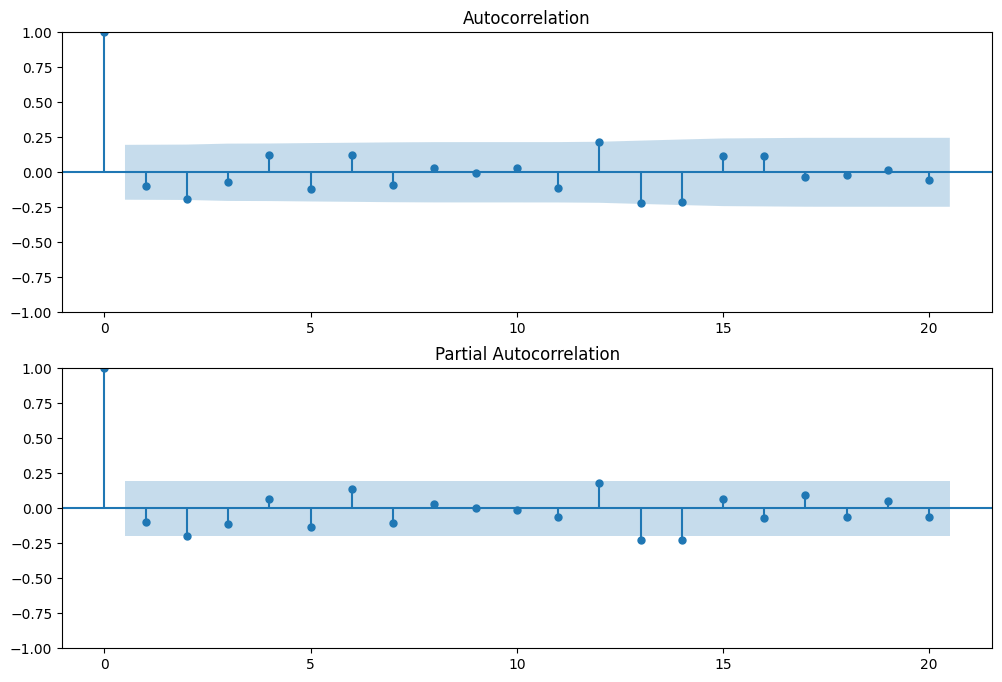

In [ ]:
# Step 2: Identify Seasonality
# Plot autocorrelation and partial autocorrelation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df1_filled['AverageTemperature'], lags=20, ax=ax1)
plot_pacf(df1_filled['AverageTemperature'], lags=20, ax=ax2)
plt.show()

In [ ]:
# Train SARIMA Model

order = (1, 1, 1)  # Non-seasonal order
seasonal_order = (1, 1, 1,12)  # Seasonal order

model = SARIMAX(df1_filled['AverageTemperature'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Step 4: Validate and Evaluate
# Example: Forecasting the next 12 months
forecast_steps = 100
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df1_filled.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

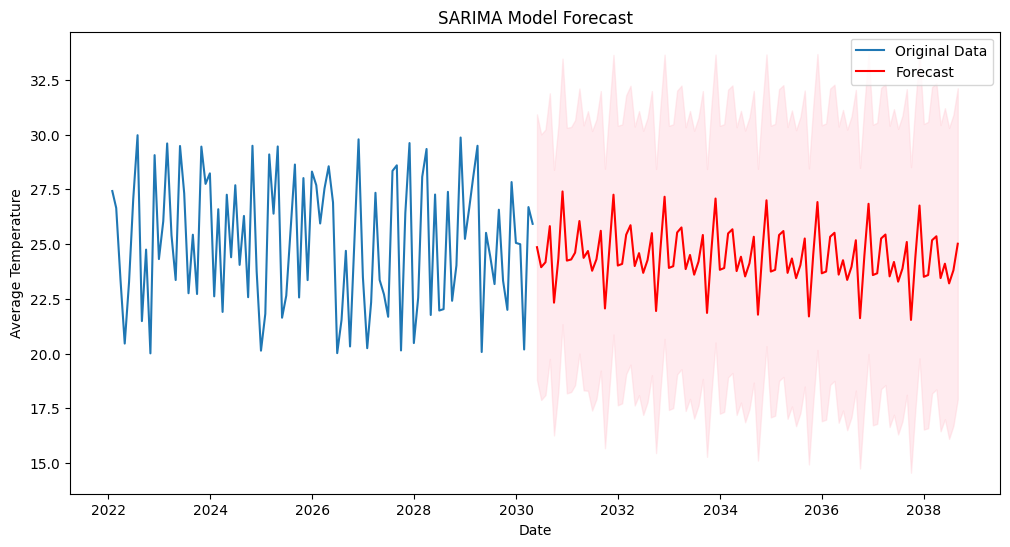

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df1_filled['AverageTemperature'], label='Original Data')
plt.plot(forecast_index, forecast.predicted_mean, color='red', label='Forecast')
plt.fill_between(forecast_index,
                 forecast.conf_int()['lower AverageTemperature'],
                 forecast.conf_int()['upper AverageTemperature'],
                 color='pink', alpha=0.3)
plt.title('SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()


In [ ]:
forecast.predicted_mean.count()

100

In [ ]:
df1_filled['AverageTemperature'].shape[0]

100

In [ ]:
# Evaluate the model
mse = mean_squared_error(df1_filled['AverageTemperature'], forecast.predicted_mean)
print("Mean Squared Error:", mse)

Mean Squared Error: 10.547379888846121


# Reading dataset of Global Land Temperatures By Counntry

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/AML_Project/GlobalLandTemperaturesByCountry.csv")

In [ ]:
df.rename(columns={'dt':'Date', 'AverageTemperature':'Avg_temp', 'AverageTemperatureUncertainty':'confidence_interval_temp'}, inplace=True)
df.head()

Date  Avg_temp  confidence_interval_temp Country
0  1743-11-01     4.384                     2.294   Åland
1  1743-12-01       NaN                       NaN   Åland
2  1744-01-01       NaN                       NaN   Åland
3  1744-02-01       NaN                       NaN   Åland
4  1744-03-01       NaN                       NaN   Åland

In [ ]:
df.rename(columns={'dt':'Date', 'AverageTemperature':'Avg_temp', 'AverageTemperatureUncertainty':'confidence_interval_temp'}, inplace=True)
df.head()

Date  Avg_temp  confidence_interval_temp Country
0  1743-11-01     4.384                     2.294   Åland
1  1743-12-01       NaN                       NaN   Åland
2  1744-01-01       NaN                       NaN   Åland
3  1744-02-01       NaN                       NaN   Åland
4  1744-03-01       NaN                       NaN   Åland

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.index

DatetimeIndex(['1743-11-01', '1743-12-01', '1744-01-01', '1744-02-01',
               '1744-03-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-08-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=577462, freq=None)

In [ ]:
df['Year'] = df.index.year
df.head()

Avg_temp  confidence_interval_temp Country  Year
Date                                                        
1743-11-01     4.384                     2.294   Åland  1743
1743-12-01       NaN                       NaN   Åland  1743
1744-01-01       NaN                       NaN   Åland  1744
1744-02-01       NaN                       NaN   Åland  1744
1744-03-01       NaN                       NaN   Åland  1744

# Visualization of Global Land Temperatures by Country

In [ ]:
def plot_line_chart(df, x, y, title, x_label, y_label):
    fig = px.line(df, x=x, y=y, title=title)
    fig.update_layout(xaxis_title=x_label, yaxis_title=y_label)
    fig.show()

def plot_forecast(train, test, predictions):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Avg_temp'], mode='lines', name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['Avg_temp'], mode='lines', name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=predictions, mode='lines', name='Predictions'))
    fig.update_layout(title='Temperature Forecast', xaxis_title='Year', yaxis_title='Temperature')
    fig.show()

In [ ]:
#Selecting a specific time period for analysis
latest_df = df.loc['1980':'2013']
latest_df.head()

Avg_temp  confidence_interval_temp Country  Year
Date                                                        
1980-01-01    -4.073                     0.518   Åland  1980
1980-02-01    -6.484                     0.441   Åland  1980
1980-03-01    -3.947                     0.466   Åland  1980
1980-04-01     2.928                     0.597   Åland  1980
1980-05-01     6.154                     0.241   Åland  1980

In [ ]:
#Selecting a specific time period for analysis
latest_df = df.loc['1980':'2013']
latest_df.head()

Avg_temp  confidence_interval_temp Country  Year
Date                                                        
1980-01-01    -4.073                     0.518   Åland  1980
1980-02-01    -6.484                     0.441   Åland  1980
1980-03-01    -3.947                     0.466   Åland  1980
1980-04-01     2.928                     0.597   Åland  1980
1980-05-01     6.154                     0.241   Åland  1980

In [ ]:
# Plotting the figure 'linear', 'spline', 'hv', 'vh', 'hvh', 'vhv']
fig = px.line(latest_df, x="Year", y="Avg_temp", color="Country", line_group="Country", hover_name="Country",
        line_shape="spline", render_mode="svg")
fig.show()

In [ ]:
#Resample the time series to make a more distinct line
resample_df = latest_df[['Avg_temp']].resample('A').mean()
resample_df.head()

Avg_temp
Date                 
1980-12-31  18.853321
1981-12-31  18.916136
1982-12-31  18.852169
1983-12-31  19.094044
1984-12-31  18.764961

In [ ]:
# Resample the time series to make a more distinct line
resample_df = latest_df[['Avg_temp']].resample('A').mean()

plot_line_chart(resample_df, resample_df.index, 'Avg_temp', 'Temperature Changes from 1980-2013', 'Year', 'Temperature')

# Dickey Fuller Test of Global Land Temperature by Country

In [ ]:
#Applying Dickey Fuller Test

print('Dickey Fuller Test Results:')
test_df= adfuller(resample_df.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(test_df[0:4], index=['Text Statistic', 'p-value', 'Lags Used', 'Number of observations'])
for key, value in test_df[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey Fuller Test Results:
Text Statistic            -0.209246
p-value                    0.937411
Lags Used                  3.000000
Number of observations    30.000000
Critical Value (1%)       -3.669920
Critical Value (5%)       -2.964071
Critical Value (10%)      -2.621171
dtype: float64


In [ ]:
#Decomposing the time series into trend, seasonal, and residual components
decomp = seasonal_decompose(resample_df, period=3)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

In [ ]:
#Creating subplots to visualize decomposition
fig = make_subplots(rows=4, cols=1, subplot_titles=('Original', 'Trend', 'Seasonal', 'Residual'))

#Plotting the original time series
fig.add_trace(go.Scatter(x=resample_df.index, y=resample_df['Avg_temp'], mode='lines', name='Original'), row=1, col=1)

#Plotting the trend component
fig.add_trace(go.Scatter(x=trend.index, y=trend, mode='lines', name='Trend'), row=2, col=1)

#Plotting the seasonal component
fig.add_trace(go.Scatter(x=seasonal.index, y=seasonal, mode='lines', name='Seasonal'), row=3, col=1)

#Plotting the residual component
fig.add_trace(go.Scatter(x=residual.index, y=residual, mode='lines', name='Residual'), row=4, col=1)

#Updating layout
fig.update_layout(title='Temperature Decomposition',
                  xaxis_title='Year',
                  yaxis_title='Temperature')
fig.show()

In [ ]:
# Calculate rolling mean, exponentially weighted mean, and rolling standard deviation
rol_mean = resample_df.rolling(window=3, center=True).mean()
ewm = resample_df.ewm(span=3).mean()
rol_std = resample_df.rolling(window=3, center=True).std()

print('Rolling mean', rol_mean.head())
print('Exponentially weighted mean', ewm.head())
print('Rolling standard deviation', rol_std.head())

Rolling mean              Avg_temp
Date                 
1980-12-31        NaN
1981-12-31  18.873875
1982-12-31  18.954116
1983-12-31  18.903725
1984-12-31  18.852712
Exponentially weighted mean              Avg_temp
Date                 
1980-12-31  18.853321
1981-12-31  18.895198
1982-12-31  18.870610
1983-12-31  18.989775
1984-12-31  18.873742
Rolling standard deviation             Avg_temp
Date                
1980-12-31       NaN
1981-12-31  0.036604
1982-12-31  0.125331
1983-12-31  0.170492
1984-12-31  0.211576


In [ ]:
# Creating subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Original vs. Rolling Mean vs. Exponentially Weighted Mean', 'Rolling Standard Deviation'))

# Plotting Original vs. Rolling Mean vs. Exponentially Weighted Mean
fig.add_trace(go.Scatter(x=resample_df.index, y=resample_df['Avg_temp'], mode='lines', name='Original'), row=1, col=1)
fig.add_trace(go.Scatter(x=rol_mean.index, y=rol_mean['Avg_temp'], mode='lines', name='Rolling Mean'), row=1, col=1)
fig.add_trace(go.Scatter(x=ewm.index, y=ewm['Avg_temp'], mode='lines', name='Exponentially Weighted Mean'), row=1, col=1)

# Plotting Rolling Standard Deviation
fig.add_trace(go.Scatter(x=rol_std.index, y=rol_std['Avg_temp'], mode='lines', name='Rolling STD'), row=1, col=2)

# Updating layout
fig.update_layout(title='Temperature Changes from 1980-2013', xaxis_title='Year', yaxis_title='Temperature')
fig.update_xaxes(title_text='Year', row=1, col=1)
fig.update_yaxes(title_text='Temperature', row=1, col=1)
fig.update_xaxes(title_text='Year', row=1, col=2)
fig.update_yaxes(title_text='Temperature', row=1, col=2)

fig.show()

In [ ]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

# Printing results of the Dickey-Fuller Test for Rolling Mean
print('Dickey-Fuller Test for the Rolling Mean:')
df_test = adfuller(rol_mean.iloc[:, 0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
    df_output['Critical Value (%s)' % key] = value
print(df_output)
print('')

# Printing results of the Dickey-Fuller Test for Exponentially Weighted Mean
print('Dickey-Fuller Test for the Exponentially Weighted Mean:')
df_test = adfuller(ewm.iloc[:, 0].values, autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
for key, value in df_test[4].items():
    df_output['Critical Value (%s)' % key] = value
print(df_output)

Dickey-Fuller Test for the Rolling Mean:
Test Statistic                 -0.777451
p-value                         0.825656
Lags Used                       0.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64

Dickey-Fuller Test for the Exponentially Weighted Mean:
Test Statistic                 -0.394950
p-value                         0.910939
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [ ]:
# Calculating differences between the Original and Rolling Mean
diff_rol_mean = resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

Avg_temp
Date                
1981-12-31  0.042261
1982-12-31 -0.101948
1983-12-31  0.190320
1984-12-31 -0.087751
1985-12-31 -0.055950

In [ ]:
# Calculating differences between the Original and Exponentially Weighted Mean
diff_ewm = resample_df - ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

Avg_temp
Date                
1980-12-31  0.000000
1981-12-31  0.020938
1982-12-31 -0.018441
1983-12-31  0.104269
1984-12-31 -0.108781

In [ ]:
# Calculating rolling mean and exponentially weighted mean for differences
df_rol_mean_diff = diff_rol_mean.rolling(window=3, center=True).mean()
df_ewm_diff = diff_ewm.ewm(span=3).mean()
df_rol_mean_diff.head()

Avg_temp
Date                
1981-12-31       NaN
1982-12-31  0.043544
1983-12-31  0.000207
1984-12-31  0.015539
1985-12-31 -0.064331

In [ ]:
# Creating subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Original vs. Rolling Mean', 'Original vs. Exponentially Weighted Mean'))

# Plotting Original vs. Rolling Mean
fig.add_trace(go.Scatter(x=diff_rol_mean.index, y=diff_rol_mean['Avg_temp'], mode='lines', name='Original'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_rol_mean_diff.index, y=df_rol_mean_diff['Avg_temp'], mode='lines', name='Rolling Mean'), row=1, col=1)

# Plotting Original vs. Exponentially Weighted Mean
fig.add_trace(go.Scatter(x=diff_ewm.index, y=diff_ewm['Avg_temp'], mode='lines', name='Original'), row=1, col=2)
fig.add_trace(go.Scatter(x=df_ewm_diff.index, y=df_ewm_diff['Avg_temp'], mode='lines', name='Exponentially Weighted Mean'), row=1, col=2)

# Updating layout
fig.update_layout(title='Temperature Changes from 1980-2013', xaxis_title='Year', yaxis_title='Temperature')
fig.update_xaxes(title_text='Year', row=1, col=1)
fig.update_yaxes(title_text='Temperature', row=1, col=1)
fig.update_xaxes(title_text='Year', row=1, col=2)
fig.update_yaxes(title_text='Temperature', row=1, col=2)

In [ ]:
# Printing results of the Dickey-Fuller Test for the Difference between the Original and Rolling Mean
print('Dickey-Fuller Test for the Difference between the Original and Rolling Mean:')
dftest = adfuller(diff_rol_mean.iloc[:, 0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)
print('')

Dickey-Fuller Test for the Difference between the Original and Rolling Mean:
Test Statistic                 -5.317660
p-value                         0.000005
# Lags Used                     3.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64



In [ ]:
# Printing results of the Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean
print('Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:')
dftest = adfuller(diff_ewm.iloc[:, 0].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)

Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:
Test Statistic                -6.057144e+00
p-value                        1.237357e-07
# Lags Used                    1.000000e+00
Number of Observations Used    3.200000e+01
Critical Value (1%)           -3.653520e+00
Critical Value (5%)           -2.957219e+00
Critical Value (10%)          -2.617588e+00
dtype: float64


# Correlation Plots for Global Land Temperatures By Country

In [ ]:
# Autocorrelation Plot
acf_fig = go.Figure()

# Use statsmodels to calculate autocorrelation
acf_values, confint = sm.tsa.acf(resample_df, nlags=8, alpha=0.05)

acf_fig.add_trace(go.Scatter(x=list(range(9)), y=acf_values, mode='lines', name='Autocorrelation'))
acf_fig.add_trace(go.Scatter(x=list(range(9)), y=confint[:, 0], fill=None, mode='lines', line=dict(color='gray'), name='95% Confidence Interval'))
acf_fig.add_trace(go.Scatter(x=list(range(9)), y=confint[:, 1], fill='tonexty', mode='lines', line=dict(color='gray'), name='95% Confidence Interval'))

acf_fig.update_layout(title='Autocorrelation Plot', xaxis_title='Lag', yaxis_title='Autocorrelation')



In [ ]:
# Partial Autocorrelation Plot
pacf_fig = go.Figure()

# Use statsmodels to calculate partial autocorrelation
pacf_values, confint = sm.tsa.pacf(resample_df, nlags=8, alpha=0.05)

pacf_fig.add_trace(go.Scatter(x=list(range(9)), y=pacf_values, mode='lines', name='Partial Autocorrelation'))
pacf_fig.add_trace(go.Scatter(x=list(range(9)), y=confint[:, 0], fill=None, mode='lines', line=dict(color='gray'), name='95% Confidence Interval'))
pacf_fig.add_trace(go.Scatter(x=list(range(9)), y=confint[:, 1], fill='tonexty', mode='lines', line=dict(color='gray'), name='95% Confidence Interval'))

pacf_fig.update_layout(title='Partial Autocorrelation Plot', xaxis_title='Lag', yaxis_title='Partial Autocorrelation')

# ARIMA for Global Land Temperatures By Country

In [ ]:
#Applying ARIMA model
train_size = int(len(resample_df) * 0.8)
train, test = resample_df.iloc[:train_size], resample_df.iloc[train_size:]

In [ ]:
#Fitting the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
fit_model = model.fit()

In [ ]:
#Forecasting
predictions = fit_model.forecast(steps=len(test))
predictions

2007-12-31    19.512868
2008-12-31    19.476556
2009-12-31    19.499651
2010-12-31    19.520646
2011-12-31    19.507798
2012-12-31    19.493419
2013-12-31    19.501819
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [ ]:
#Evaluating the model
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.15603648941566642


In [ ]:
#Creating a figure
fig = go.Figure()

#Plotting the train data
fig.add_trace(go.Scatter(x=train.index, y=train['Avg_temp'], mode='markers,lines', name='Train'))

#Plotting the test data
fig.add_trace(go.Scatter(x=test.index, y=test['Avg_temp'], mode='markers,lines', name='Test'))

#Plotting the predictions data
fig.add_trace(go.Scatter(x=test.index, y=predictions, mode='markers,lines', name='Predictions'))

#Adding layout information
fig.update_layout(title='ARIMA Model Forecast',
                  xaxis_title='Date',
                  yaxis_title='Temperature',
                  legend=dict(x=0, y=1, traceorder='normal'))

In [ ]:
train_size = int(len(resample_df) * 0.8)
train, test = resample_df.iloc[:train_size], resample_df.iloc[train_size:]

In [ ]:
#Hyperparameter Tuning
best_rmse = float('inf')
best_order = None

for p in range(1, 5):
    for d in range(1, 3):
        for q in range(1, 5):
            order = (p, d, q)
            model = ARIMA(train, order=order)
            fit_model = model.fit()
            predictions = fit_model.forecast(steps=len(test))
            rmse = sqrt(mean_squared_error(test, predictions))

            if rmse < best_rmse:
                best_rmse = rmse
                best_order = order

In [ ]:
#Fitting the ARIMA model with the best hyperparameters
final_model = ARIMA(resample_df, order=best_order)
fit_model = final_model.fit()

In [ ]:
#Forecasting
predictions = fit_model.forecast(steps=len(test))

In [ ]:
#Evaluating the model
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.35289623846249596


In [ ]:
#Creating a figure
fig = go.Figure()

#Plotting the train data
fig.add_trace(go.Scatter(x=train.index, y=train['Avg_temp'], mode='markers,lines', name='Train'))

#Plotting the test data
fig.add_trace(go.Scatter(x=test.index, y=test['Avg_temp'], mode='markers,lines', name='Test'))

#Plotting the predictions data
fig.add_trace(go.Scatter(x=test.index, y=predictions, mode='markers,lines', name='Predictions'))

#Adding layout information
fig.update_layout(title='ARIMA Model Forecast',
                  xaxis_title='Date',
                  yaxis_title='Temperature',
                  legend=dict(x=0, y=1, traceorder='normal'))